# Trend and Seasonality

In [4]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


Dekompozycja szeregów czasowych opiera się na myślenie o szeregu czasowym jako kombinacji:

- trendu, 
- sezonowości, 
- szumu.


Szereg czasowy zazwyczaj składa się z części powtarzającej się i szumu:

- Level: Średnia wartość w szeregu czasowym.
- Trend: Wzrastająca lub malejąca wartość w szeregu czasowym.
- Seasonality:  powtarzający się cykl krótkoterminowy w szeregu czasowym.
- Noise : losowe zaburzenia w szeregu czasowym.

Uważa się, że szereg czasowy jest agregatem lub kombinacją tych czterech elementów.
Wszystkie szeregi czasowe mają poziom (level) i szum. Elementy trendu i sezonowości są opcjonalne.

### Additive Model

y(t) = Level + Trend + Seasonality + Noise

### Multiplicative Model

y(t) = Level * Trend * Seasonality * Noise

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

# Przykład
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [6]:
data = [i+randrange(10) for i in range(1,100)]
series = pd.Series(data)

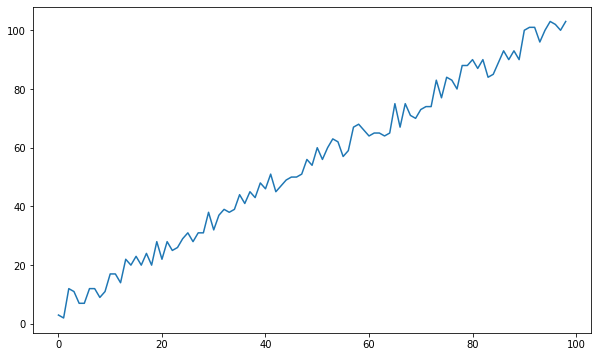

In [7]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [8]:
result = seasonal_decompose(data, model='additive', freq=1)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


In [9]:
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

[  3.   2.  12.  11.   7.   7.  12.  12.   9.  11.  17.  17.  14.  22.
  20.  23.  20.  24.  20.  28.  22.  28.  25.  26.  29.  31.  28.  31.
  31.  38.  32.  37.  39.  38.  39.  44.  41.  45.  43.  48.  46.  51.
  45.  47.  49.  50.  50.  51.  56.  54.  60.  56.  60.  63.  62.  57.
  59.  67.  68.  66.  64.  65.  65.  64.  65.  75.  67.  75.  71.  70.
  73.  74.  74.  83.  77.  84.  83.  80.  88.  88.  90.  87.  90.  84.
  85.  89.  93.  90.  93.  90. 100. 101. 101.  96. 100. 103. 102. 100.
 103.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

<Figure size 864x432 with 0 Axes>

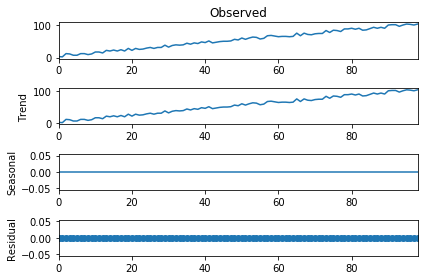

In [10]:
plt.figure(figsize=(12,6));
result.plot()
plt.show()

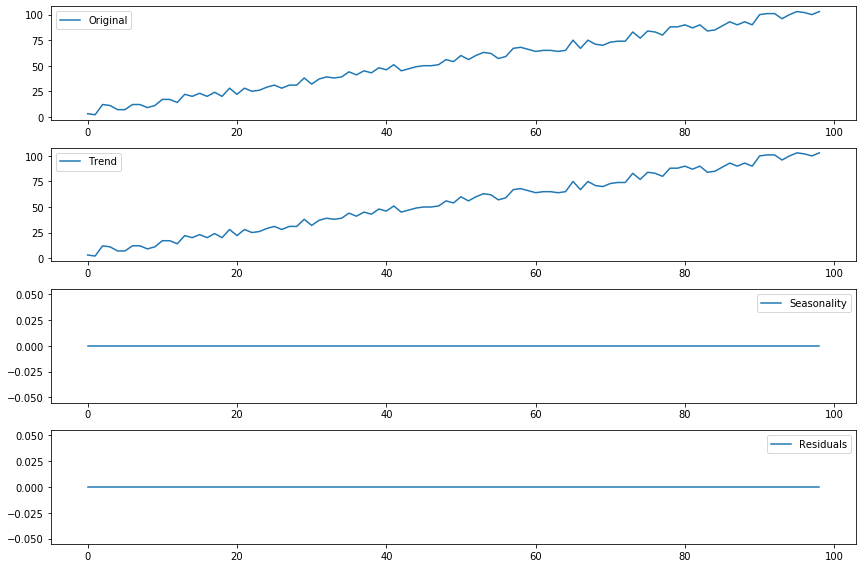

In [11]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [12]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


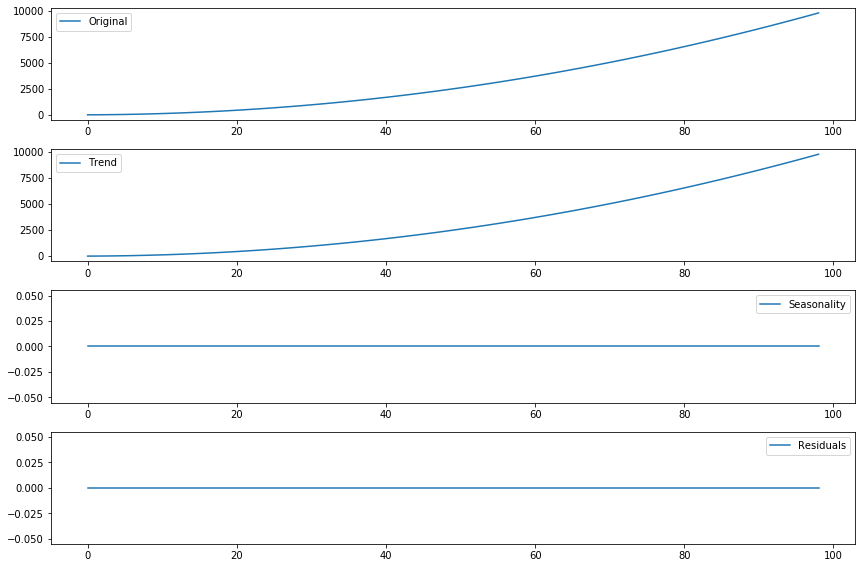

In [13]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

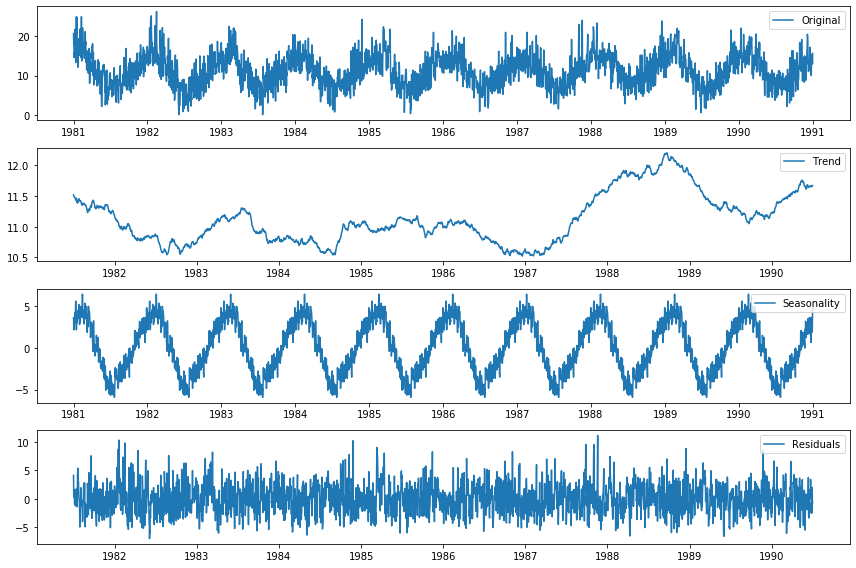

In [14]:
import pandas as pd
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
# series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# result = seasonal_decompose(series + np.min(np.abs(series))+0.00000001, model='additive', freq=365)
result = seasonal_decompose(series , model='additive', period=365)

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

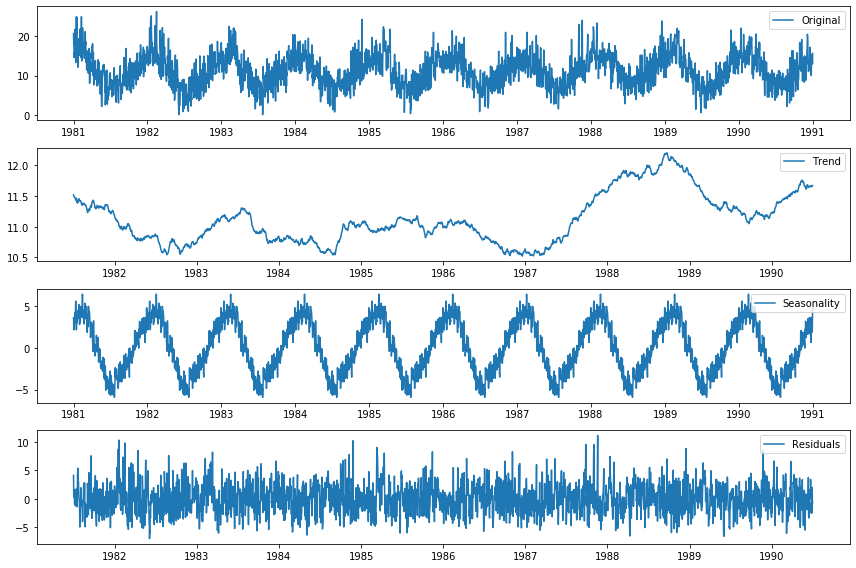

In [15]:
import pandas as pd
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
# series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# result = seasonal_decompose(series + np.min(np.abs(series))+0.00000001, model='additive', freq=365)
result = seasonal_decompose(series , model='additive', period=365)

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


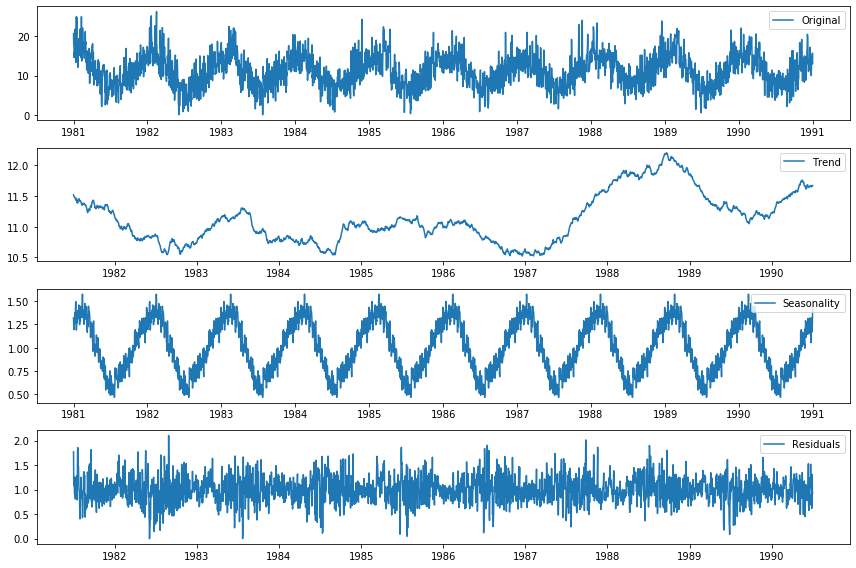

In [16]:
# import pandas as pd
# series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
# # series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# result = seasonal_decompose(series + np.min(np.abs(series))+0.00000001, model='multiplicative', freq=365)

# plt.figure(figsize=(12,8));
# plt.subplot(411)
# plt.plot(result.observed, label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(result.trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(result.seasonal,label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(result.resid, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [17]:
import pandas as pd
series = pd.read_csv('international-airline-passengers.csv', index_col = 0, squeeze = True, parse_dates=['Month'])

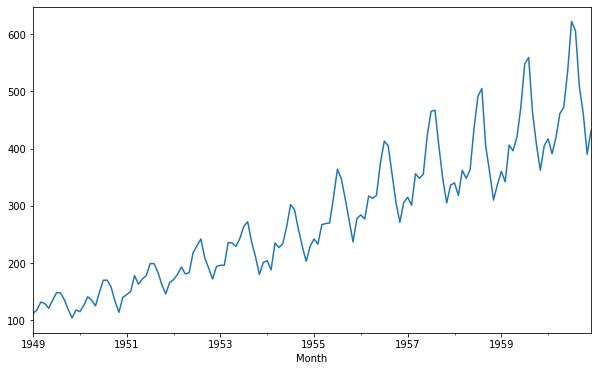

In [18]:
result = seasonal_decompose(series, model='additive')

plt.figure(figsize=(10,6));
series.plot()
plt.show()

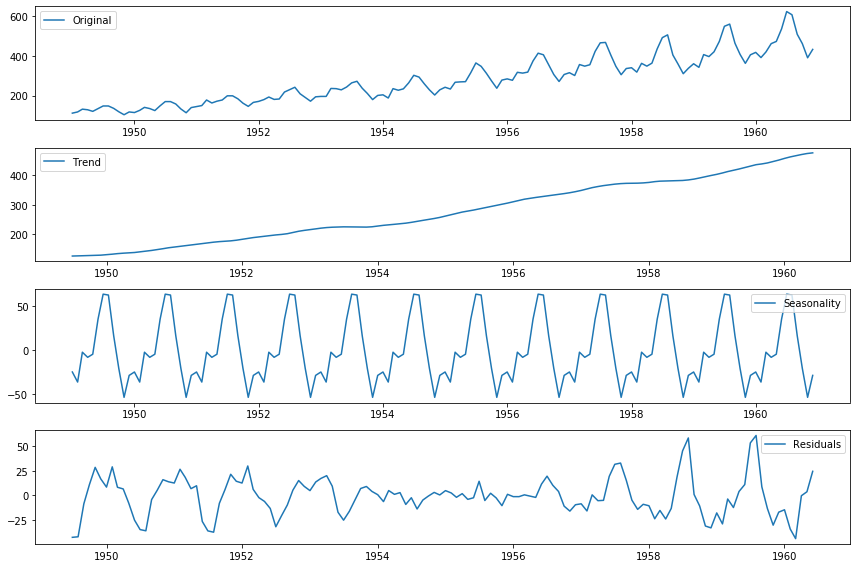

In [27]:
result = seasonal_decompose(series, model='additive')

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
result = seasonal_decompose(series, model='multiplicative')

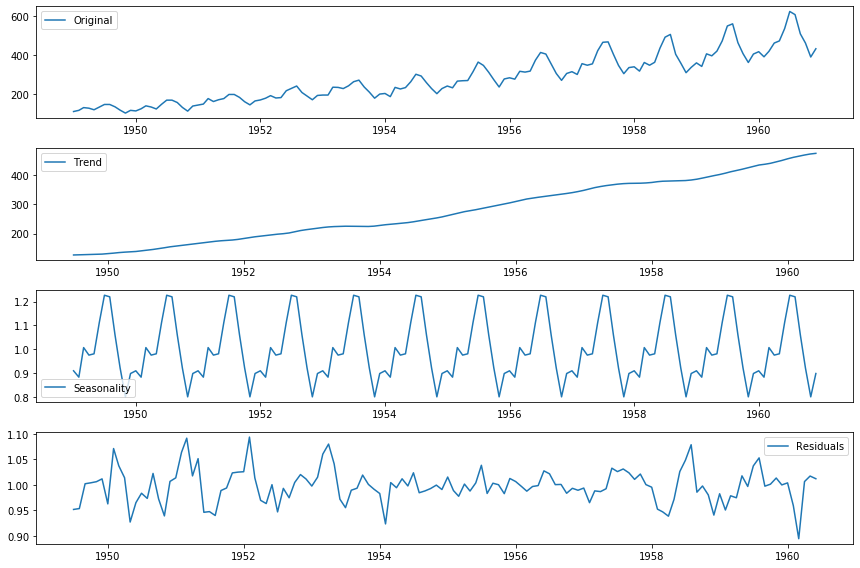

In [21]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
from pandas.plotting import autocorrelation_plot

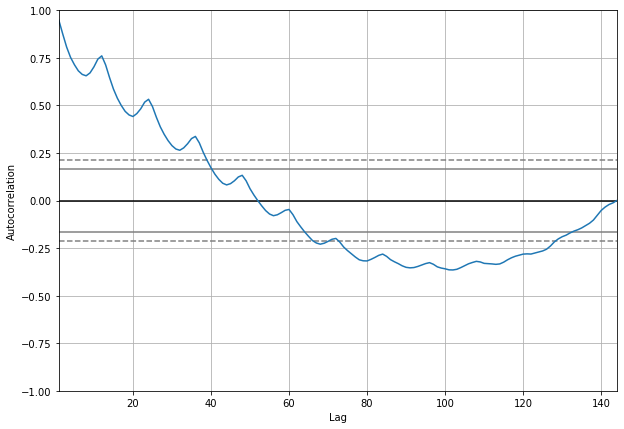

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot(series)
plt.show()

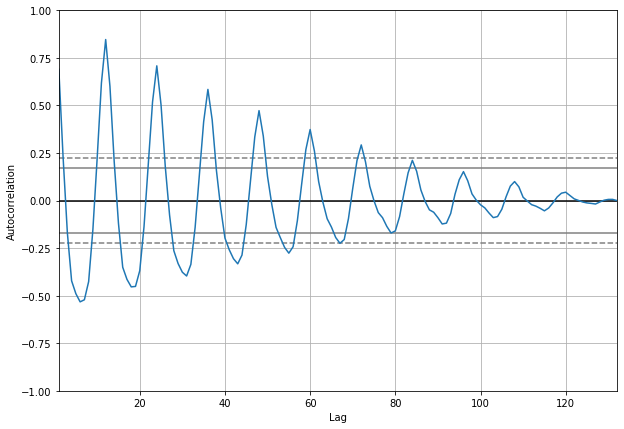

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot((result.observed - result.trend).dropna())
plt.show()

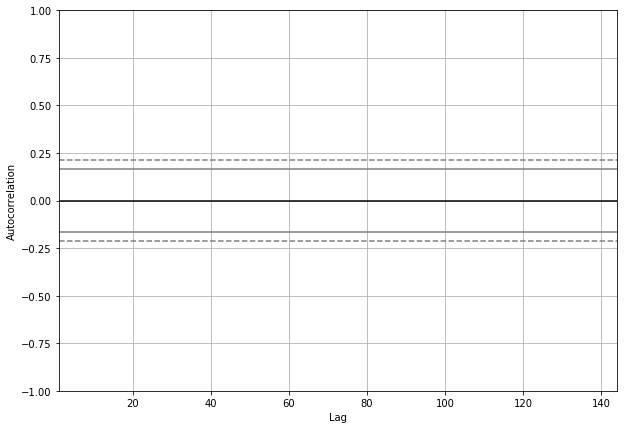

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot(result.resid)
plt.show()

# res1 = result.seasonal.dropna() 
# res1 = result.resid.dropna()
# res2
# res2

In [26]:
(result.observed - result.trend).dropna()

Month
1949-07-01    21.208333
1949-08-01    20.750000
1949-09-01     8.041667
1949-10-01    -9.583333
1949-11-01   -25.000000
                ...    
1960-02-01   -70.375000
1960-03-01   -46.208333
1960-04-01    -8.333333
1960-05-01    -0.750000
1960-06-01    59.958333
Length: 132, dtype: float64